Se agregó una columna promedio para indicar si el precio de renta está por arriba del promedio, y es lo que se intenta predecir
La primer red es con algunas columnas del datasete original, lo dejo en el drive, con los datos originales y la segunda es con los datos escalados



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Dataset filename
#filename='airbnb_clean_F2M4_Postwor
filename='Dataset_conCentros.csv'

In [5]:
#Ruta al repo del archivo Github de Procesamiento de Datos con Python

Github_path = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/'
#Github_path_image = 'https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/images/'

file_path=Github_path+filename
#file_path_image=Github_path_image+imagename

print('Usando GithubPath: '+file_path)
#print('Usando GithubPath image: '+file_path_image)

Usando GithubPath: https://raw.githubusercontent.com/BeduDSEquipo9/C2DSF3_ML/main/Datasets/Dataset_conCentros.csv


In [6]:
local_filepath='../Datasets/Dataset_conCentros.csv'
file_path=local_filepath

In [7]:
data=pd.read_csv(file_path)
data.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063


In [3]:
df = pd.read_csv('/content/airbnb_clean.csv')
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_response_rate,review_scores_rating,bedrooms,beds,price
0,2,2,0.0,3,1,NYC,100,89,1,1,50
1,3,2,1.0,3,1,LA,0,98,1,1,199
2,3,4,1.0,3,1,NYC,80,94,0,2,85
3,2,3,1.0,3,1,LA,100,95,1,2,70
4,3,5,2.0,3,1,Chicago,100,88,2,2,72


In [9]:
df=data
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,Sunset Park,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,Venice,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,Bensonhurst,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,San Gabriel,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,Woodlawn,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063


In [10]:
df["price"].mean()

159.95879435973552

In [11]:
#df['promedio'] = [1 if df['price'] >= df["price"].mean() else 0]
df['promedio'] = np.where(df['price']>= df["price"].mean(), 1, 0)

In [12]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro,promedio
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,NYC,"This is a comfortable, simple beautiful room, ...",...,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672,0
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,LA,Renovated clean & modern 1 bedroom in the hear...,...,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674,1
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,NYC,My studio is located in the heart of Bensonhur...,...,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423,0
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,LA,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080,0
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,Chicago,Located in the heart of the bustling Woodlawn/...,...,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063,0


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['city'] = le.fit_transform(df['city'])
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,n_days_lastrev,n_days_ashost,distanciaCentro,promedio
0,House,2,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,0.0,1,3,1,4,"This is a comfortable, simple beautiful room, ...",...,15,89,11232,1.0,1.0,50.0,2003,4200,10.621672,0
1,Apartment,3,"{Internet,""Wireless Internet"",Kitchen,Heating,...",2,1.0,1,3,1,3,Renovated clean & modern 1 bedroom in the hear...,...,12,98,90291,1.0,1.0,199.0,2430,3272,22.456674,1
2,Apartment,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,1,3,1,4,My studio is located in the heart of Bensonhur...,...,26,94,11214,0.0,2.0,85.0,2057,2756,15.051423,0
3,Townhouse,2,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.0,1,3,1,3,"我们位于洛杉矶圣盖博市,距离夏威夷超市,99大华超市,顺发超市(全部为华人超市,语言沟通无障...",...,33,95,91776,1.0,2.0,70.0,2182,2559,13.751080,0
4,Condominium,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,2.0,1,3,1,1,Located in the heart of the bustling Woodlawn/...,...,60,88,60637,2.0,2.0,72.0,2192,2960,11.198063,0


In [15]:
X = df.drop(columns=["price","promedio"])
y = df["promedio"]

In [16]:
X.shape

(59288, 26)

In [17]:
def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

In [18]:
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=1)

In [19]:
b_model = tf.keras.Sequential([l0,l1,l2])

2023-04-26 22:02:11.953062: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-26 22:02:11.953949: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [20]:
b_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53359, 26) (5929, 26) (53359,) (5929,)


In [24]:
history = b_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=True, validation_split=0.1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

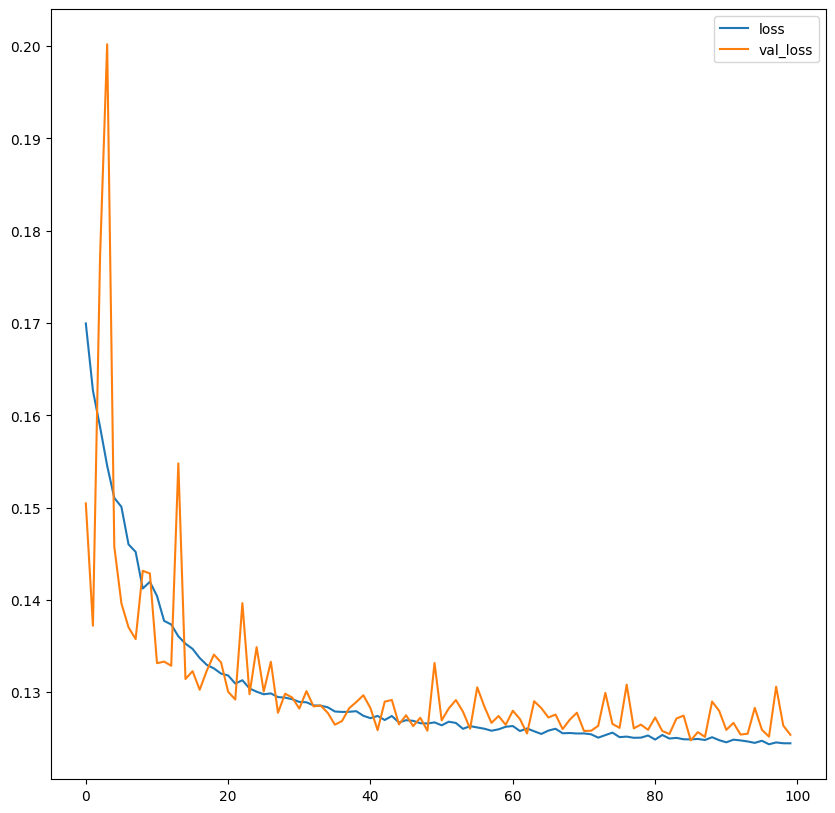

In [26]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

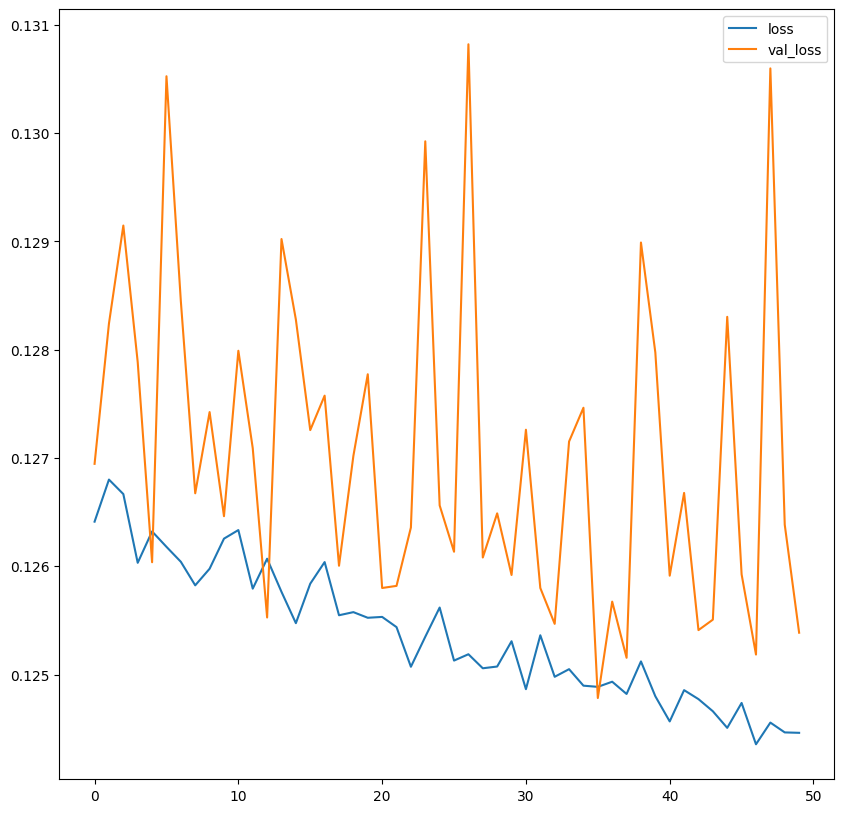

In [27]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"][50:100], label="loss")
plt.plot(history.history["val_loss"][50:100], label="val_loss")

plt.legend(loc="upper right")

In [28]:
y_pred = b_model.predict(X_test)

186/186 [==============================] - 0s 2ms/step


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test, y_pred)

0.403422721115701

SEGUNDA RED

In [32]:
X = escalar_a_01(X)

In [33]:
X

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_response_rate,review_scores_rating,bedrooms,beds
0,0.5,0.066667,0.0000,0.50,1.0,0.8,1.00,0.89,0.1,0.055556
1,1.0,0.066667,0.1250,0.50,1.0,0.6,0.00,0.98,0.1,0.055556
2,1.0,0.200000,0.1250,0.50,1.0,0.8,0.80,0.94,0.0,0.111111
3,0.5,0.133333,0.1250,0.50,1.0,0.6,1.00,0.95,0.1,0.111111
4,1.0,0.266667,0.2500,0.50,1.0,0.2,1.00,0.88,0.2,0.111111
...,...,...,...,...,...,...,...,...,...,...
59283,1.0,0.266667,0.2500,0.25,1.0,0.6,1.00,0.88,0.3,0.166667
59284,1.0,0.066667,0.1875,0.50,1.0,0.8,1.00,1.00,0.1,0.055556
59285,1.0,0.133333,0.1250,0.25,1.0,0.6,0.33,0.00,0.1,0.111111
59286,1.0,0.133333,0.1250,0.50,1.0,0.8,0.86,1.00,0.1,0.055556


In [34]:
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=1)

In [35]:
b_model3 = tf.keras.Sequential([l0,l1,l2])
b_model3.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [36]:
history3 = b_model3.fit(X_train, y_train, epochs=500, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/500
1501/1501 [==============================] - 4s 2ms/step - loss: 0.4238 - val_loss: 0.1484
Epoch 2/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1644 - val_loss: 0.1622
Epoch 3/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1640 - val_loss: 0.1496
Epoch 4/500
1501/1501 [==============================] - 4s 2ms/step - loss: 0.1610 - val_loss: 0.1543
Epoch 5/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1562 - val_loss: 0.1518
Epoch 6/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1563 - val_loss: 0.1408
Epoch 7/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1510 - val_loss: 0.1374
Epoch 8/500
1501/1501 [==============================] - 4s 3ms/step - loss: 0.1512 - val_loss: 0.1396
Epoch 9/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1477 - val_loss: 0.1485
Epoch 10/500
1501/1501 [==============================] - 3s 2ms/step - l

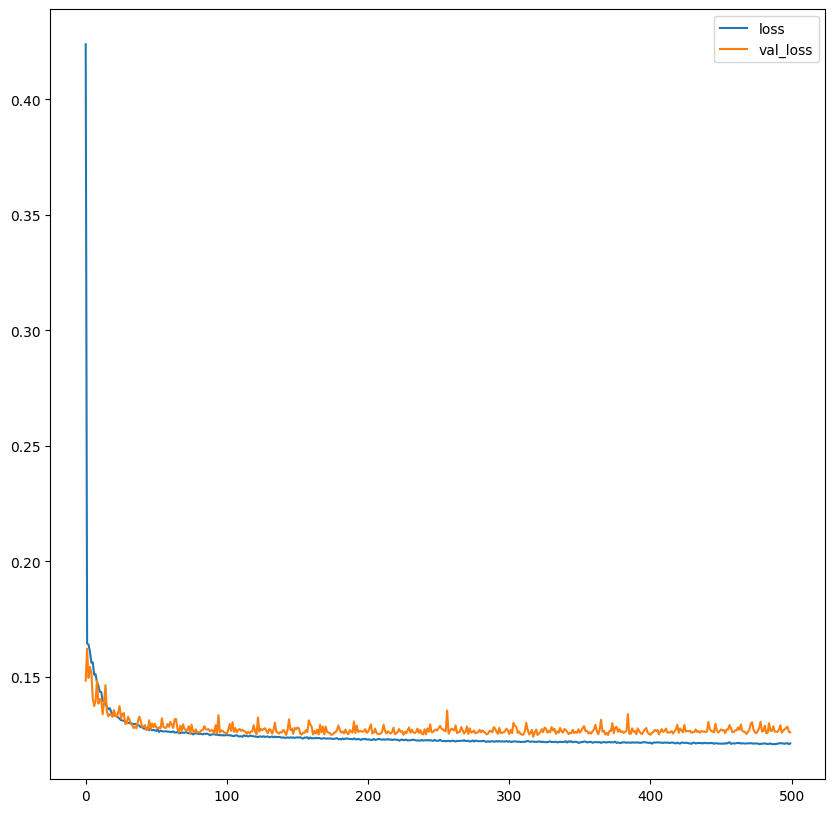

In [37]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history3.history["loss"], label="loss")
plt.plot(history3.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [38]:
y_pred = b_model3.predict(X_test)

186/186 [==============================] - 0s 1ms/step


In [39]:
r2_score(y_test, y_pred)

0.4084010868955197